In [55]:
import numpy as np
from RandomForest import RandomForest
from SOMAC import SOMAC
import matplotlib.pyplot as plt

In [56]:
filename = "/home/andre/UFMG/SOMAC-ML/data/18092018/somac/RF-noweight/backlog_file.npy"

data = np.load(filename, encoding = "latin1").item()

tkeys = np.array(list(data.keys()))

train_keys = []
test_keys = []

for t in tkeys[:130]:
    if np.random.rand() < 0.6:
        train_keys.append(t)
    else:
        test_keys.append(t)
        
train = {}
for i, t in zip(range(len(train_keys)), train_keys):
    train[i] = data[t]
train_file = "./_tmp/train_file.npy"
np.save(train_file, train)

test = {}
for i, t in zip(range(len(test_keys)), test_keys):
    test[i] = data[t]
test_file = "./_tmp/test_file.npy"
np.save(test_file, test)

print("Train set size = {}, Test set size = {}".format(len(train_keys), len(test_keys)))

Train set size = 78, Test set size = 52


In [57]:
test_data = np.load(test_file, encoding = "latin1").item()

In [58]:
# somac = SOMAC(reg_csma = RandomForest(), reg_tdma = EsembleNNet())
# EsembleNNet(n_new_estimators = 10, n_neurons = 3)
somac = SOMAC(reg_csma = RandomForest(n_estimators = 100, max_depth = 5, max_features = "log2", n_new_estimators = 10),
              reg_tdma = RandomForest(n_estimators = 100, max_depth = 5, max_features = "log2", n_new_estimators = 10))
somac.train(train_file)

In [59]:
err_csma = []
err_tdma = []

y_csma = []
y_tdma = []

for t in range(len(test_keys)):
    prot, gain, y_hat_csma, y_hat_tdma = somac.decision(test_data[t])
    y = test_data[t]["metrics"][0, 1]
    prot = test_data[t]["prot"]
    
    if prot == 0:
        err_csma.append(np.abs(float(y_hat_csma - y)))
        y_csma.append(float(y))
    else:
        err_tdma.append(np.abs(float(y_hat_tdma - y)))
        y_tdma.append(float(y))

    print("---")

Prot: 0, y = 15.0005745254457
y_hat_CSMA = [[3.98715722]], y_hat_TDMA = [[5.29501196]]
Evaluation: v_csma = 4.54, v_tdma = 5.3
Gain = 0.1431233661804731
---
Prot: 0, y = 16.566666301339865
y_hat_CSMA = [[8.04228694]], y_hat_TDMA = [[5.67291027]]
Evaluation: v_csma = 8.99, v_tdma = 5.67
Gain = 0.36904240035994723
---
Prot: 0, y = 20.36724125407636
y_hat_CSMA = [[12.99554384]], y_hat_TDMA = [[6.8039411]]
Evaluation: v_csma = 14.27, v_tdma = 6.8
Gain = 0.5230429028935613
---
Prot: 0, y = 17.5942526422441
y_hat_CSMA = [[12.64730247]], y_hat_TDMA = [[6.82273476]]
Evaluation: v_csma = 14.1, v_tdma = 6.82
Gain = 0.5161497361158278
---
Prot: 0, y = 21.380459245294333
y_hat_CSMA = [[12.95984154]], y_hat_TDMA = [[5.58697229]]
Evaluation: v_csma = 14.76, v_tdma = 5.59
Gain = 0.621523769509998
---
Prot: 0, y = 20.266667064279318
y_hat_CSMA = [[11.76025478]], y_hat_TDMA = [[6.17777421]]
Evaluation: v_csma = 13.9, v_tdma = 6.18
Gain = 0.5554730777095536
---
Prot: 0, y = 24.58333295211196
y_hat_CSMA 

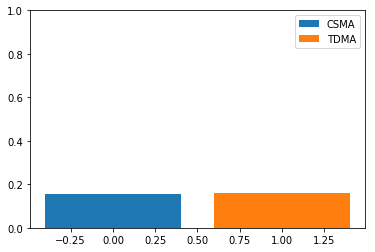

In [60]:
plt.bar(0, np.mean(err_csma) / np.mean(y_csma))
plt.bar(1, np.mean(err_tdma) / np.mean(y_tdma))
plt.ylim([0, 1])
plt.legend(["CSMA", "TDMA"])